In [1]:
# pip install ttth-mds5-analyzer

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [3]:
titanic = pd.read_csv('data/titanic.csv')

In [4]:
titanic.drop(columns=['PassengerId','Name','Cabin','Ticket'], inplace=True)

In [5]:
titanic.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [6]:
titanic['Pclass'] = titanic['Pclass'].astype('category')
titanic['Survived'] = titanic['Survived'].astype('category')

In [7]:
titanic.dtypes

Survived    category
Pclass      category
Sex           object
Age          float64
SibSp          int64
Parch          int64
Fare         float64
Embarked      object
dtype: object

In [8]:
num_cols = titanic.select_dtypes(include=['int','float']).columns # các biến định lượng
num_cols

Index(['Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [9]:
cat_cols = titanic.select_dtypes(include=['object','category']).columns # các biến định tính
cat_cols

Index(['Survived', 'Pclass', 'Sex', 'Embarked'], dtype='object')

In [10]:
from analysis.analyzer import TTTH_Analyzer as Analyzer

In [11]:
_analyzer = Analyzer()

### Phân tích đơn biến

Class count of Pclass:

3    491
1    216
2    184
Name: Pclass, dtype: int64


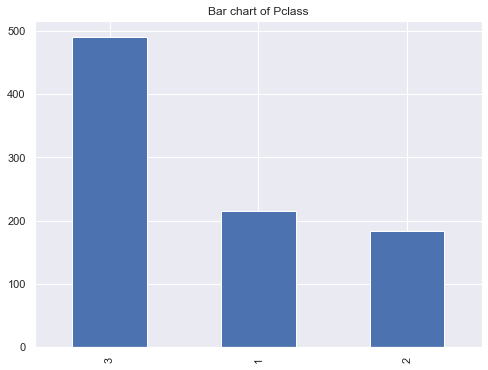

In [12]:
# Biến category: Pclass
_analyzer.analyze_category_variable(variable_name='Pclass', df=titanic)

Class count of Survived:

0    549
1    342
Name: Survived, dtype: int64


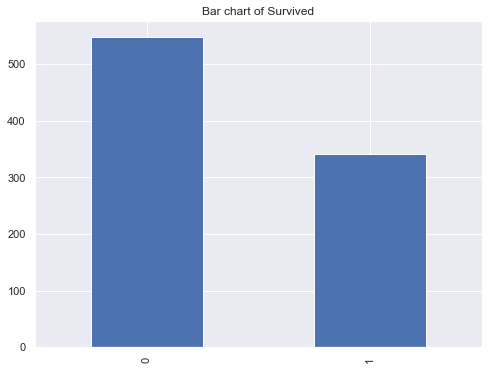

Class count of Pclass:

3    491
1    216
2    184
Name: Pclass, dtype: int64


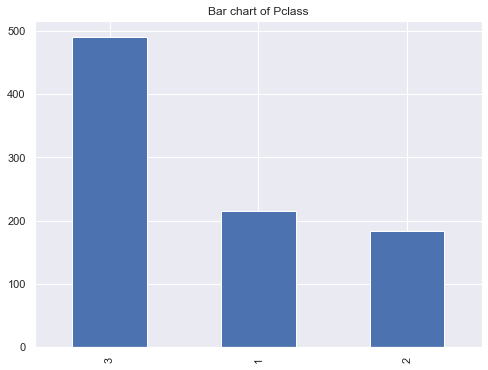

Class count of Sex:

male      577
female    314
Name: Sex, dtype: int64


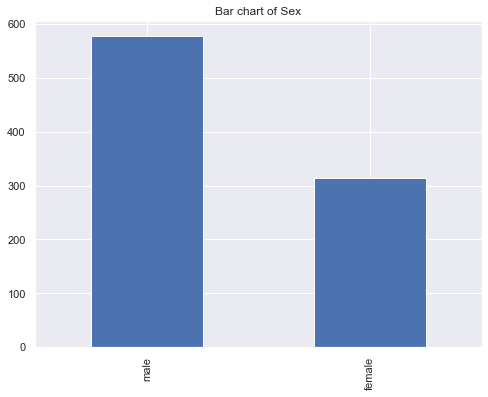

Class count of Embarked:

S    644
C    168
Q     77
Name: Embarked, dtype: int64


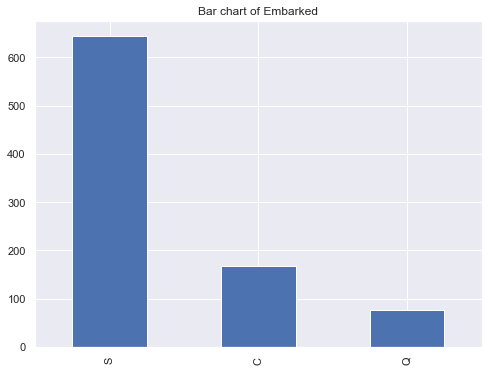

In [13]:
for col in cat_cols:
    _analyzer.analyze_category_variable(variable_name=col, df=titanic)
    print('='*60)

=====
central tendency of Age: {'mean': 29.69911764705882, 'median': 28.0, 'mode': 24.0, 'min': 0.42, 'max': 80.0, 'range': 79.58}
=====
Dispersion of Age: 
 {'range': 79.58, 'q1': 20.125, 'q3': 38.0, 'iqr': 17.875, 'var': 211.01912474630802, 'skew': 0.38910778230082704, 'kurtosis': 0.17827415364210353}
=====


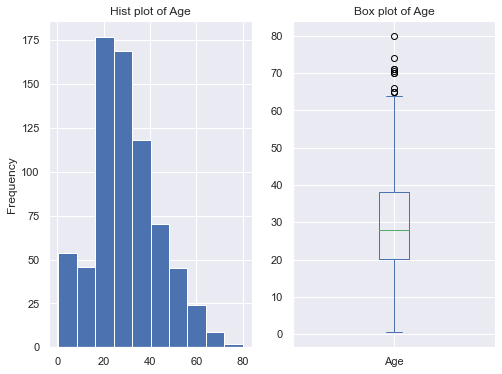

In [14]:
# Biến numeric: Age
_analyzer.analyze_numeric_variable(variable_name='Age', df=titanic)

=====
central tendency of Age: {'mean': 29.69911764705882, 'median': 28.0, 'mode': 24.0, 'min': 0.42, 'max': 80.0, 'range': 79.58}
=====
Dispersion of Age: 
 {'range': 79.58, 'q1': 20.125, 'q3': 38.0, 'iqr': 17.875, 'var': 211.01912474630802, 'skew': 0.38910778230082704, 'kurtosis': 0.17827415364210353}
=====


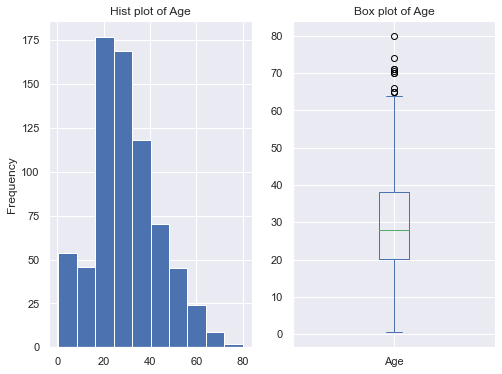

=====
central tendency of SibSp: {'mean': 0.5230078563411896, 'median': 0.0, 'mode': 0, 'min': 0, 'max': 8, 'range': 8}
=====
Dispersion of SibSp: 
 {'range': 8, 'q1': 0.0, 'q3': 1.0, 'iqr': 1.0, 'var': 1.2160430774662985, 'skew': 3.6953517271630565, 'kurtosis': 17.880419726645968}
=====


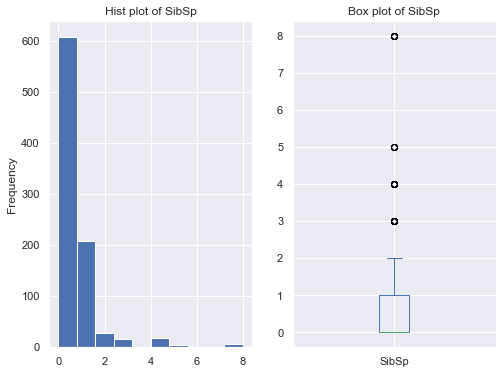

=====
central tendency of Parch: {'mean': 0.38159371492704824, 'median': 0.0, 'mode': 0, 'min': 0, 'max': 6, 'range': 6}
=====
Dispersion of Parch: 
 {'range': 6, 'q1': 0.0, 'q3': 0.0, 'iqr': 0.0, 'var': 0.6497282437357343, 'skew': 2.7491170471010933, 'kurtosis': 9.778125179021648}
=====


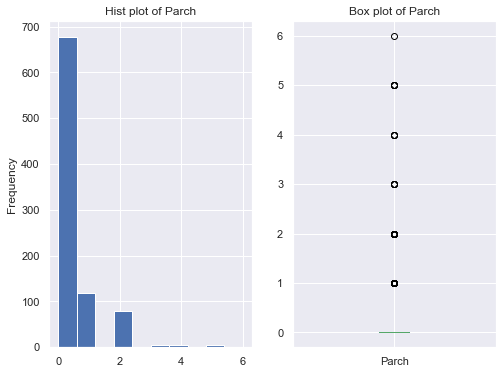

=====
central tendency of Fare: {'mean': 32.204207968574636, 'median': 14.4542, 'mode': 8.05, 'min': 0.0, 'max': 512.3292, 'range': 512.3292}
=====
Dispersion of Fare: 
 {'range': 512.3292, 'q1': 7.9104, 'q3': 31.0, 'iqr': 23.0896, 'var': 2469.436845743116, 'skew': 4.787316519674893, 'kurtosis': 33.39814088089868}
=====


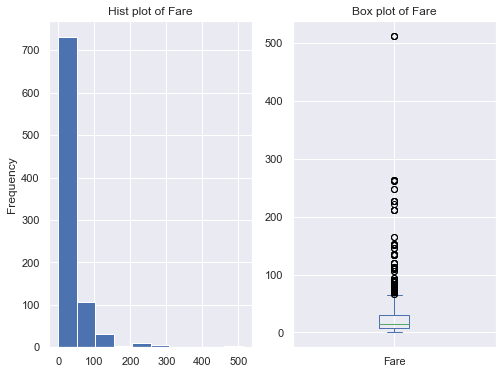

In [15]:
# phân tích cho tất cả các biến số
for col in num_cols:
    _analyzer.analyze_numeric_variable(variable_name=col, df=titanic)
    print('='*60)

### Phân tích hai biến

=====Analyze of Pclass and Survived=====


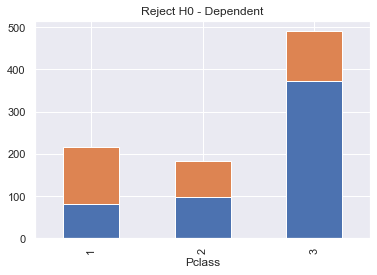

{'var1': 'Pclass', 'var2': 'Survived', 'result': 'Reject H0 - Dependent'}

In [16]:
# Biến category và category
_analyzer.analyze_category_vs_category(var1='Pclass', var2='Survived', df=titanic)

In [17]:
twoway_table = _analyzer.create_tw_table(var1='Pclass', var2='Survived', df=titanic)

In [18]:
twoway_table

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [19]:
_analyzer.use_chi_2_evaluation(twoway_table)

'Reject H0 - Dependent'

                         sum_sq     df          F        PR(>F)
C(Pclass)          23010.355131    2.0  64.825107  1.404675e-26
C(Sex)              3389.132827    1.0  19.095829  1.429337e-05
C(Pclass):C(Sex)     481.844296    2.0   1.357459  2.579827e-01
Residual          125656.031067  708.0        NaN           NaN


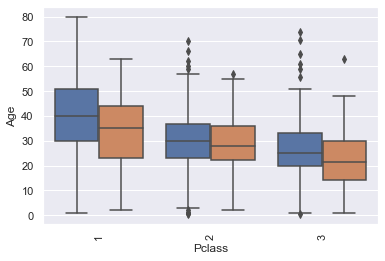

In [20]:
# Biến numeric và category
_analyzer.analyze_continous_vs_categories(continous_var='Age', category_vars=['Pclass', 'Sex'], df=titanic)

In [ ]:
sns.boxplot(data=titanic, x='Pclass', y='Age', hue='Sex')
plt.show()

In [ ]:
_analyzer.analyze_anova_table_for_continous_vs_categories(continous_var='Age', 
                                                          category_vars=['Pclass', 'Sex'], df=titanic)

In [ ]:
_analyzer.check_outlier_of_numerical_variable(numerical_variable='Fare', df=titanic)

In [ ]:
_analyzer.visualize_box_for_continous_vs_categories(continous_var='Fare', category_vars=['Pclass','Sex'], df=titanic)